# Mohammad-reza Einollahi
# 98722522

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.fftpack import dctn, idctn, fft2, ifft2, fftshift, ifftshift

%matplotlib inline

#  Question 1

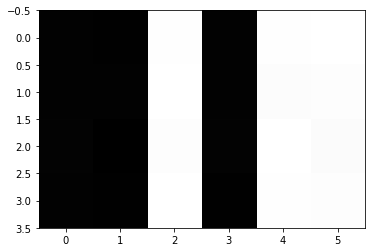

In [2]:
question_1_matrix = a =list([[2, 1, 254, 2, 254, 255], 
                             [2, 2, 255, 2, 252, 253], 
                             [3, 0, 253, 3, 255, 251], 
                             [2, 1, 255, 1, 254, 253]])

q1_array = np.array(question_1_matrix)
plt.imshow(q1_array, 'gray')
plt.show()

## Entropy Function

In [3]:
def img_entropy(img):
    
    hist = np.histogram(img.flatten(), bins=256, range=(0,255))[0]
    prob = hist/hist.sum()
    
    entropy = -1 * (prob[prob > 0] * np.log(prob[prob > 0])).sum()
    return entropy

In [4]:
img_entropy(q1_array)

2.02932302955708

# Question 2

### Q2_template.py

In [5]:

quantize_matrix = np.array([[16,11,10,16,24,40,51,61],
                            [12,12,14,19,26,58,60,55],
                            [14,13,16,24,40,57,69,56],
                            [14,17,22,29,51,87,80,62],
                            [18,22,37,56,68,109,103,77],
                            [24,35,55,64,81,104,113,92],
                            [49,64,78,87,103,121,120,101],
                            [72,92,95,98,112,100,130,99]])

sequence = [-40.0, 8.0, 7.0, 1.0, 5.0, 1.0, -1.0, 1.0, 1.0, -1.0, 0.0, -0.0, 1.0, 'EOB']

# x = 0, 0, 1, 2, 1, 0, ...
# y = 0, 1, 0, 0, 1, 2, ...

    

def sequence_to_block(sequence):
    img = np.zeros((8,8)).astype('float32')
    
    # x = 0, 0, 1, 2, 1, 0, ...
    # y = 0, 1, 0, 0, 1, 2, ...
    x = list()
    y = list()

    flag = -1

    for i in range(8):
        x = x + ([item for item in list(range(i+1))[::flag]])
        flag = flag * -1
        y = y + ([item for item in list(range(i+1))[::flag]])
     
    for i, value in enumerate(sequence):
        if value == 'EOB':
            return img

        img[x[i], y[i]] = value
            
    return img 


def inverse_transform(block):
    
    
    img = sequence_to_block(block)
    decoding = img * quantize_matrix
    transformed_img = np.uint8((idctn(decoding, norm='ortho')) + 128)

    return transformed_img

In [6]:
sequence_to_block(sequence)

array([[-40.,   8.,   1.,  -1.,   0.,   0.,   0.,   0.],
       [  7.,   5.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
       [ -1.,  -0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]], dtype=float32)

In [7]:
transformed_img = inverse_transform(sequence)
print(transformed_img[:2, :2])

[[101  94]
 [ 93  89]]


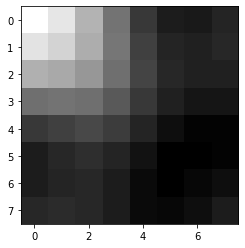

In [8]:
plt.imshow(transformed_img, 'gray')
plt.show()

# Question 4

In [9]:
### Load input image and sensor image 
cam1 = cv2.imread('cam_1.bmp', 0)
cam2 = cv2.imread('cam_2.bmp', 0)
sensor = cv2.imread('sensor.bmp', 0)

## cam1

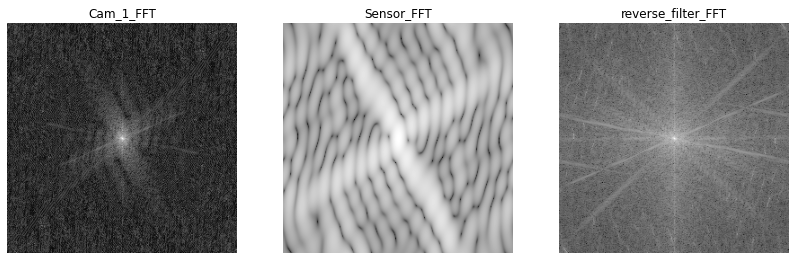

In [10]:
# Image Normalization
cam_1_normal = np.float32(cam1) / 255

cam_1_fft = fft2(cam_1_normal) #G(u, v)

sensor_fft = fft2(sensor)
# Sensor Normalization
sensor_fft_normal = sensor_fft / sensor_fft.max()
# Inverse filtering -> F_hat(u, v)
restor_cam_1_fft = cam_1_fft / sensor_fft_normal #F_hat


plt.figure(figsize=(14,8))

plt.subplot(131)
plt.imshow(np.abs(np.log(fftshift(cam_1_fft))), 'gray')
plt.title('Cam_1_FFT')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(np.abs(fftshift(sensor_fft_normal))), 'gray')
plt.title('Sensor_FFT')
plt.axis('off')

plt.subplot(133)
plt.imshow(np.log(np.abs(fftshift(restor_cam_1_fft))), 'gray')
plt.title('reverse_filter_FFT')
plt.axis('off')


plt.show()

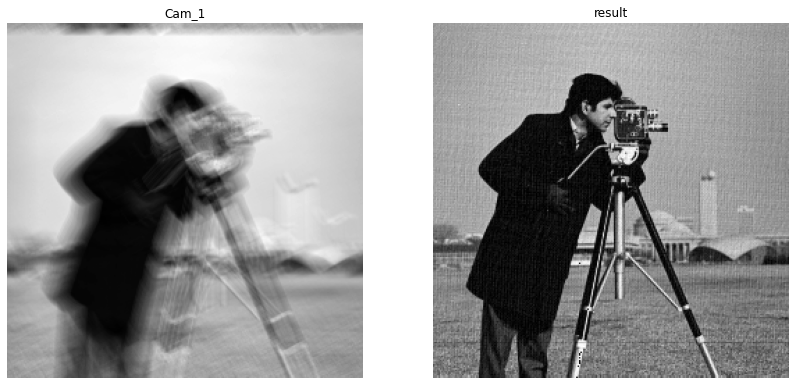

In [11]:
restor_cam_1 = np.uint8(np.abs(ifft2(restor_cam_1_fft)*255))

plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(cam1, 'gray')
plt.title('Cam_1')
plt.axis('off')

plt.subplot(122)
plt.imshow(restor_cam_1, 'gray')
plt.title('result')
plt.axis('off')

plt.show()

## Cam2

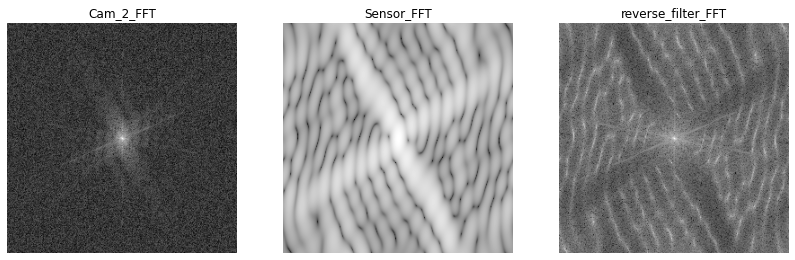

In [12]:
cam_2_normal = np.float32(cam2) / 255
cam_2_fft = fft2(cam_2_normal) #G(u, v)

restor_cam_2_fft = cam_2_fft / sensor_fft_normal #F_hat

plt.figure(figsize=(14,8))

plt.subplot(131)
plt.imshow(np.abs(np.log(fftshift(cam_2_fft))), 'gray')
plt.title('Cam_2_FFT')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(np.abs(fftshift(sensor_fft_normal))), 'gray')
plt.title('Sensor_FFT')
plt.axis('off')

plt.subplot(133)
plt.imshow(np.log(np.abs(fftshift(restor_cam_2_fft))), 'gray')
plt.title('reverse_filter_FFT')
plt.axis('off')


plt.show()

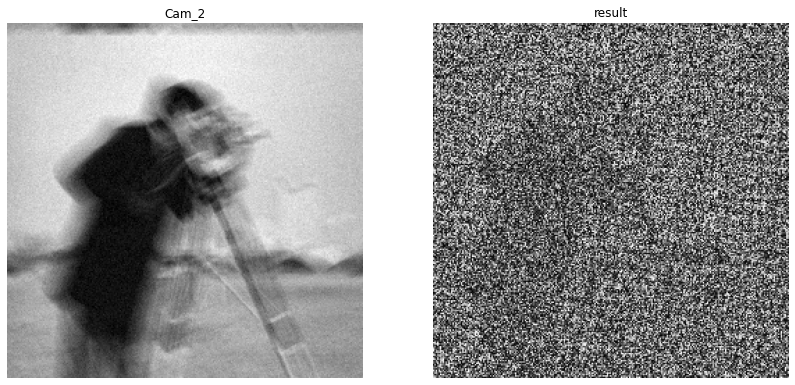

In [13]:
restor_cam_2 = np.uint8(np.abs(ifft2(restor_cam_2_fft)*255))

plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(cam2, 'gray')
plt.title('Cam_2')
plt.axis('off')

plt.subplot(122)
plt.imshow(restor_cam_2, 'gray')
plt.title('result')
plt.axis('off')

plt.show()

## Type of the noises

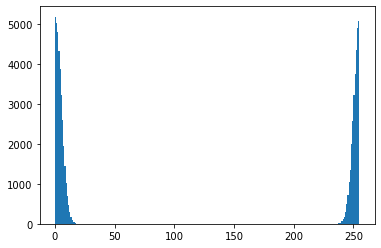

In [14]:
noise = cam2 - cam1

plt.hist(noise.flatten(), bins=256)
plt.show()

In [15]:
sigma = len(np.unique(noise)) / 6
print("sigma is approximately about " + str(sigma))

sigma is approximately about 7.0
